# Seattle and Boston Insights from Airnbn Open Data

# Introduction

This notebook is a part from data scientist nanodegrees from Udaicty, that aim to creating a blog post and Github repository to begin building a data science portfolio of students.
We will work in this datasets from Airbnb homes of Seattle and Boston, and exploring throughout this notebook the calendar and listings data homes of Seattle, let's start.

First, I pose three questions that I tried to answer:

* How much AirBNB homes are earning by season in Both Seattle and Boston?
* Does the neighborhoods affect the price in Seattle and Boston?
* Which city has highest average rates Seattle or Boston, and in each city which top 10 average rate neighborhoods?

In [160]:
# import needed library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [129]:
# read data as a date frame
# seattle data
seattle_calendar = pd.read_csv('seattle_calendar.csv')
seattle_listings =  pd.read_csv('seattle_listings.csv')

# Boston data
boston_calendar = pd.read_csv('boston_calendar.csv')
boston_listings =  pd.read_csv('boston_listings.csv')


In [130]:
seattle_calendar

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [131]:
boston_calendar

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
5,12147973,2017-08-31,f,NaN
6,12147973,2017-08-30,f,NaN
7,12147973,2017-08-29,f,NaN
8,12147973,2017-08-28,f,NaN
9,12147973,2017-08-27,f,NaN


As we can see, Seattle and Boston have exactly the same Strucutre and columns.

### Convert Data Type

In [132]:
seattle_calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [133]:
boston_calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

We need to change the data type in Both Seattle and Boston Calender. We need to convert date to datetime and price to float. for price, we should remove the $ and Comma so we can convert it easily.

In [134]:
# convert date to datetime data type
seattle_calendar['date'] = pd.to_datetime(seattle_calendar['date'])

boston_calendar['date'] = pd.to_datetime(boston_calendar['date'])

# convert price to double
# cut the $ from the string 
seattle_calendar.price = seattle_calendar.price.str[1:]
seattle_calendar.price = seattle_calendar.price.str.replace(',', '').astype(float)

boston_calendar.price = boston_calendar.price.str[1:]
boston_calendar.price = boston_calendar.price.str.replace(',', '').astype(float)

In [135]:
seattle_calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [136]:
boston_calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

## 1-How much AirBNB homes are earning by season in Both Seattle and Boston?

In [137]:
# set index to date
seattle_temp_data = seattle_calendar.set_index('date')['price']
boston_temp_data = boston_calendar.set_index('date')['price']

In [138]:
# Using TimeGrouper function to divid the month according to the seasons
g = pd.TimeGrouper('QS-DEC')
seattle_avg = seattle_temp_data.groupby(g).mean()
boston_avg = boston_temp_data.groupby(g).mean()

# Reset the index so we can use date column to get months
seattle_avg = seattle_avg.reset_index()
boston_avg = boston_avg.reset_index()
seattle_avg['month'] = (pd.DatetimeIndex(seattle_avg['date']).month)
boston_avg['month'] = (pd.DatetimeIndex(boston_avg['date']).month)

# map months to seasons
mapping = {3:'Spring', 6:'Summer', 9:'Fall', 12:'Winter'}
seattle_avg.replace({'month': mapping}, inplace=True)
boston_avg.replace({'month': mapping}, inplace=True)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


In [156]:
# group by seasons
seattle_seasons_price = seattle_avg.groupby(seattle_avg['month']).mean()
boston_seasons_price = boston_avg.groupby(boston_avg['month']).mean()

# add a city column
seattle_seasons_price['city'] = 'seattle'
boston_seasons_price['city'] = 'boston'

# Union Both dateframes
seasons_price = pd.concat([
                    seattle_seasons_price,boston_seasons_price
                ])

# add season column to use it in plot
seasons_price['season'] = seasons_price.index.tolist()

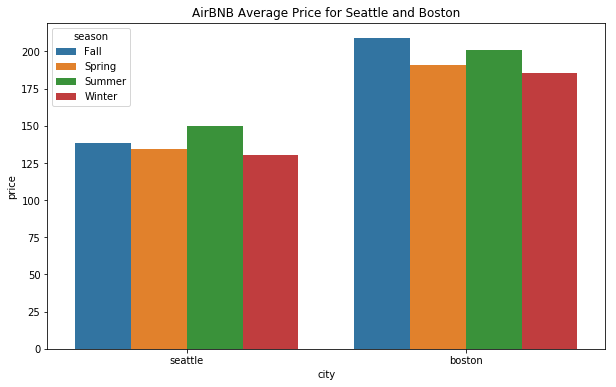

In [191]:
# plot the average price for Seattle and Boston for all seasons
plt.figure(figsize=(10, 6))
sns.barplot(x='city', hue='season', y='price', data=seasons_price).set_title('AirBNB Average Price for Seattle and Boston')
plt.show()

From the above chart we can say that Boston earn more in all seasons compared to Seattle. 

As we expect the peak season in Seattle is Summer. However, It's a Fall in Boston which made me Suprise. As we all Know holiday in summer so I thought It will be summer also in Boston. Also, we expect winter to have the lowest price which what we get from the plot.

## 2- Does the neighborhoods affect the price in Seattle and Boston?

In [218]:
seattle_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [247]:
seattle_neighbourhood_price = seattle_listings[['neighbourhood','price']]
boston_neighbourhood_price = boston_listings[['neighbourhood','price']]

In [248]:
# convert price to double
# cut the $ from the string 
seattle_neighbourhood_price.price = seattle_neighbourhood_price.price.str[1:]
seattle_neighbourhood_price.price = seattle_neighbourhood_price.price.str.replace(',', '').astype(float)

boston_neighbourhood_price.price = boston_neighbourhood_price.price.str[1:]
boston_neighbourhood_price.price = boston_neighbourhood_price.price.str.replace(',', '').astype(float)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [262]:
# group by neighbourhood
seattle_neighbourhood_price = seattle_neighbourhood_price.groupby(seattle_neighbourhood_price['neighbourhood']).mean()
boston_neighbourhood_price = boston_neighbourhood_price.groupby(boston_neighbourhood_price['neighbourhood']).mean()

In [289]:
# Use transpose function to rotate the table
seattle_neighbourhood_price = seattle_neighbourhood_price.transpose()
boston_neighbourhood_price = boston_neighbourhood_price.transpose()

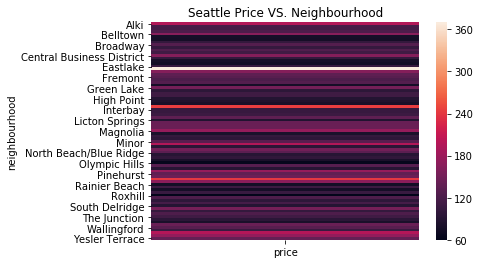

In [293]:
sns.heatmap(seattle_neighbourhood_price).set_title('Seattle Price VS. Neighbourhood');

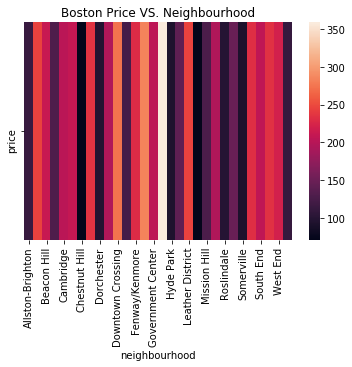

In [295]:
sns.heatmap(boston_neighbourhood_price).set_title('Boston Price VS. Neighbourhood');

It Obvious from Color gradient in the above heatmaps for both Seattle and Boston that the Neighborhoods affect the price of renting.

## 3- Which city has highest average rates Seattle or Boston, and in each city which top 10 average rate neighborhoods?

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


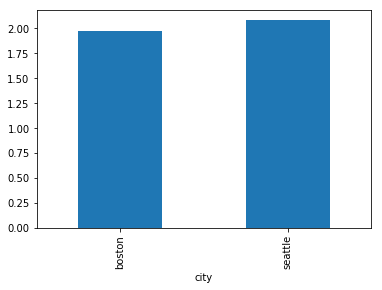

In [271]:
# Get needed columns
seattle_rates = seattle_listings[['id','neighbourhood','reviews_per_month']]
boston_rates = boston_listings[['id','neighbourhood', 'reviews_per_month']]
seattle_rates['city'] = 'seattle'
boston_rates['city'] = 'boston'

# Union Both dateframes
rates = pd.concat([
                    seattle_rates,boston_rates
                ])

# rename column
rates = rates.rename(columns={'reviews_per_month': 'rate'})

# average rates by city
rates.groupby('city')['rate'].mean().plot(kind='bar')


we found that the average rates in Boston is almost 1.97 and in Seattle 2.07, there is no bif difference between them so we can't decide which one has the highest rate beacuse the different in deciemal is pretty small.

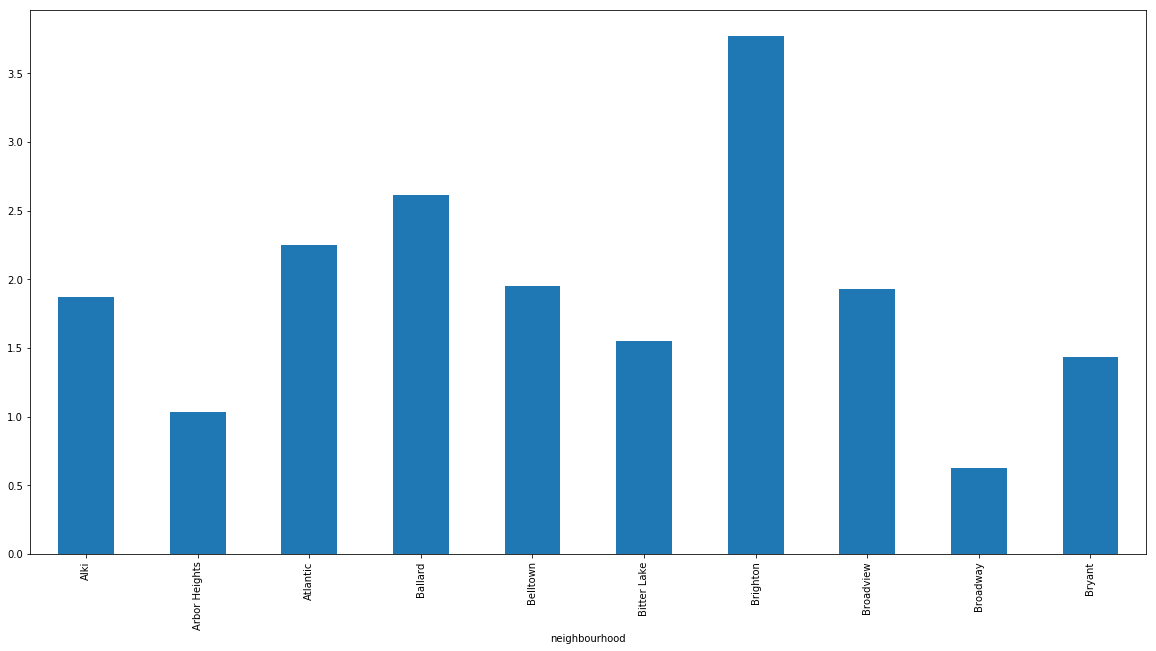

In [280]:
seattle_rates = seattle_rates.rename(columns={'reviews_per_month': 'rate'})
seattle_rates.groupby('neighbourhood')['rate'].mean().iloc[0:10].plot(kind = 'bar',figsize = (20,10));

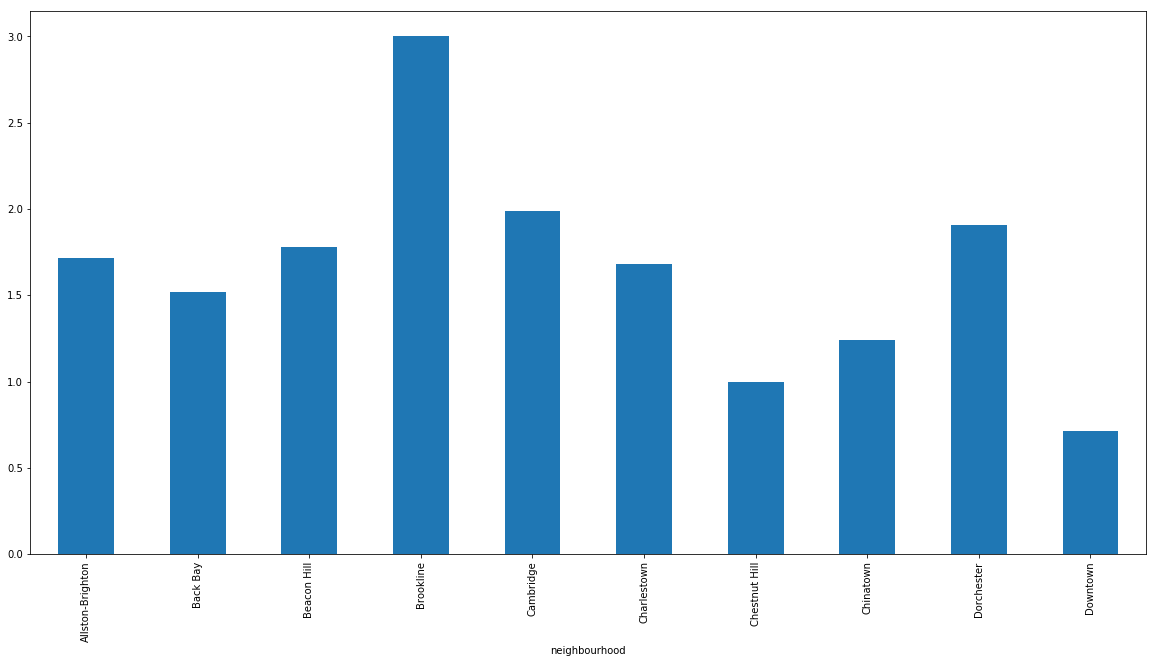

In [281]:
boston_rates = boston_rates.rename(columns={'reviews_per_month': 'rate'})
boston_rates.groupby('neighbourhood')['rate'].mean().iloc[0:10].plot(kind = 'bar',figsize = (20,10));

- For Seattle Neighborhoods:
The highest average rate is more than 3.5 for Brighton Neighborhoods, and the 10th Neighborhood is Broadway with average rate less than 1.
- For Boston Neighborhoods:
The highest average rate is almost  3.5 for Brookline Neighborhoods, and the 10th Neighborhood is Downtown with average rate less than 1.